In [1]:
def load_data_by_dimension(dimension):
    root="./datasets/"
    data_filename = root+f'kryptonite-{dimension}-X.npy'
    labels_filename = root+f'kryptonite-{dimension}-y.npy'

    try:
        data = np.load(data_filename)
        labels = np.load(labels_filename)
        print(f"Loaded dataset with dimension {dimension}. Data shape: {data.shape}, Labels shape: {labels.shape}")
        return data, labels
    except FileNotFoundError:
        print(f"Dataset for dimension {dimension} not found.")
        return None, None

Loaded dataset with dimension 9. Data shape: (18000, 9), Labels shape: (18000,)
Loaded dataset with dimension 12. Data shape: (24000, 12), Labels shape: (24000,)
Loaded dataset with dimension 15. Data shape: (30000, 15), Labels shape: (30000,)
Loaded dataset with dimension 18. Data shape: (36000, 18), Labels shape: (36000,)
Loaded dataset with dimension 24. Data shape: (48000, 24), Labels shape: (48000,)
Loaded dataset with dimension 30. Data shape: (60000, 30), Labels shape: (60000,)
Loaded dataset with dimension 45. Data shape: (90000, 45), Labels shape: (90000,)


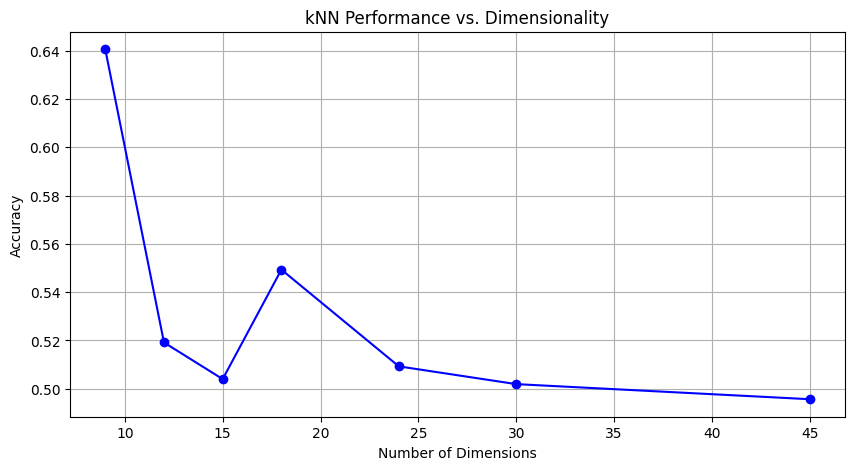

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dimensions = [9,12,15,18,24,30,45]
best_ks = []
accuracies = []

for dim in dimensions:
    data, labels = load_data_by_dimension(dim)
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

    model = MLPClassifier(hidden_layer_sizes=(np.unique(y_train).size * 2, np.unique(y_train).size * 2), max_iter=1000, random_state=99)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)

# Plot the performance of models with their best k
plt.figure(figsize=(10, 5))
plt.plot(dimensions, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.title('kNN Performance vs. Dimensionality')
plt.grid(True)
plt.show()